In [1]:
#importing necessary liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
#loading data
df=pd.read_excel('iris.xls')

In [3]:
#for showing first 5 columns of data under heading
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#to know how many rows and columns in the data
df.shape

(150, 5)

In [5]:
#for summary of dataframes such as size and structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#descriptive statistics of a dataframeobject
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#to count the number of occurance in the classification ccolumn
df['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [8]:
#identifying null values
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [9]:
#to show the column labels
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [10]:
#columns with null values
no_columns =df[['SL', 'SW', 'PL']]

In [11]:
no_columns.isna().sum()

SL    7
SW    6
PL    6
dtype: int64

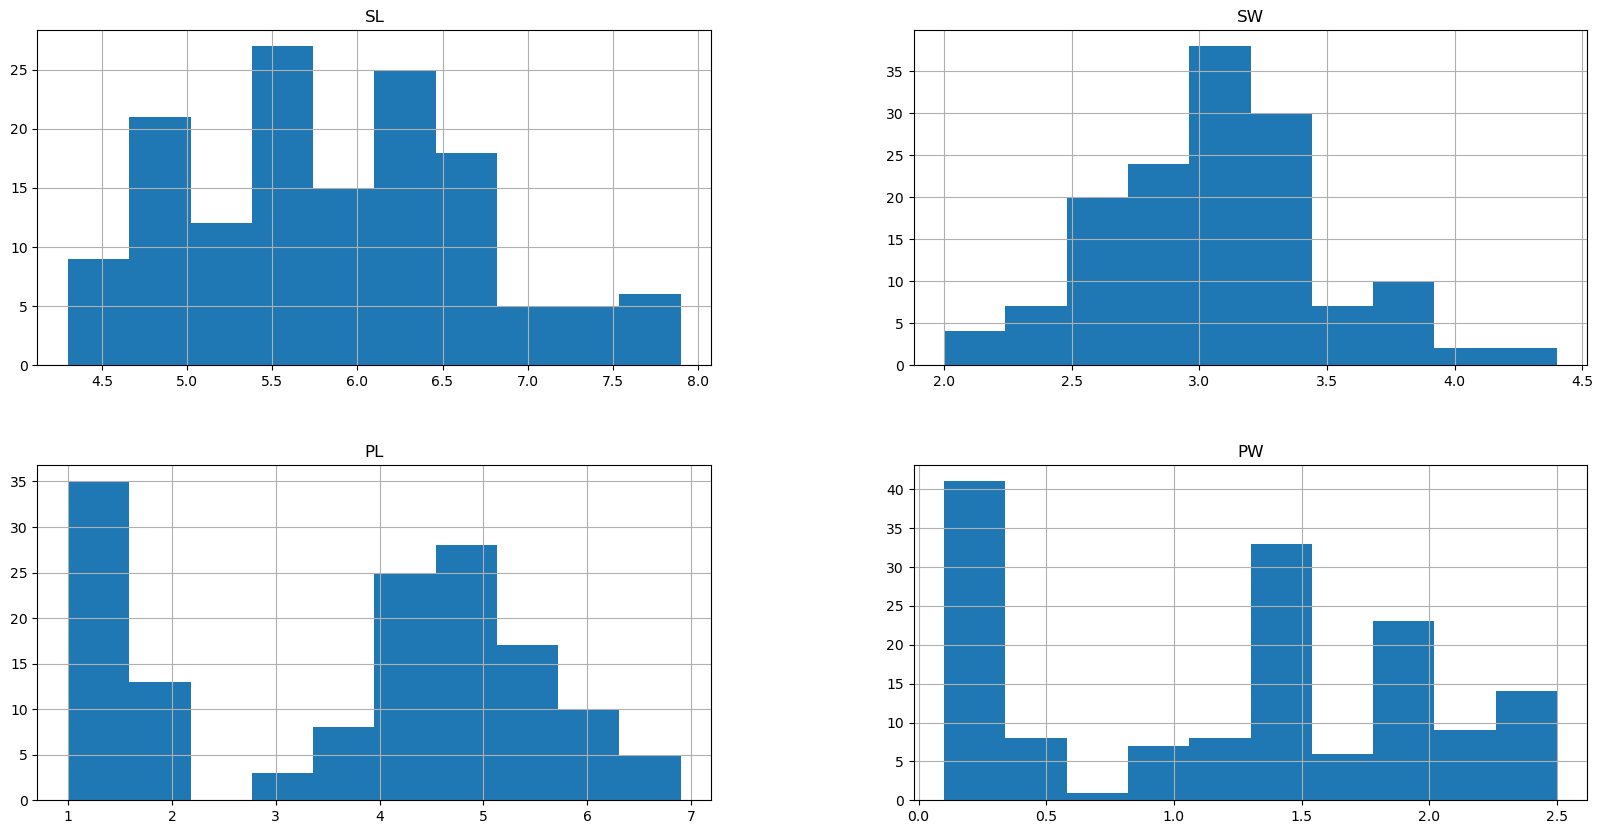

In [12]:
#to find the date is skewed or not
freqgraph= df.select_dtypes(include ='float')
freqgraph.hist(figsize=(20,10))
plt.show()

the data is skewed.so we use medain to remove the null values.

In [13]:
#removing null values
df['SL']=df['SL'].fillna(df['SL'].median())
df['SW']=df['SW'].fillna(df['SW'].median())
df['PL']=df['PL'].fillna(df['PL'].median())

In [14]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

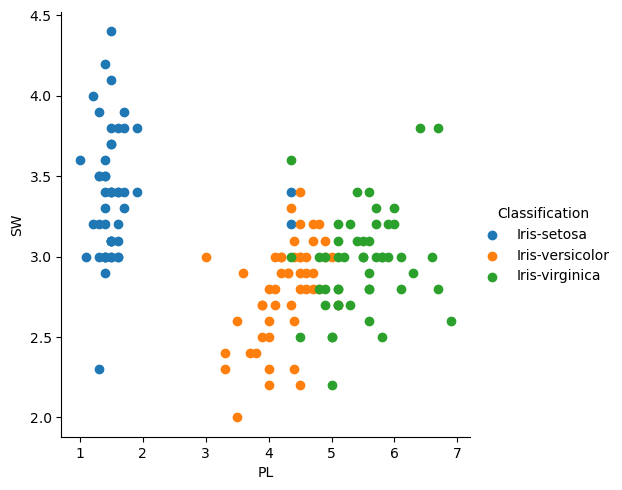

In [15]:
#creating a sctter plot to find iris species in different coloures
sns.FacetGrid(df, hue="Classification", size=5) \
   .map(plt.scatter, "PL", "SW") \
   .add_legend()

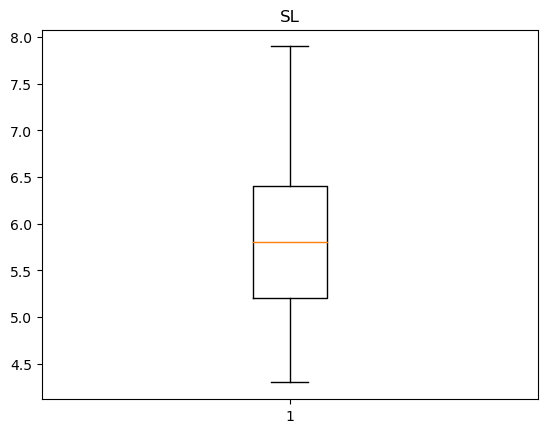

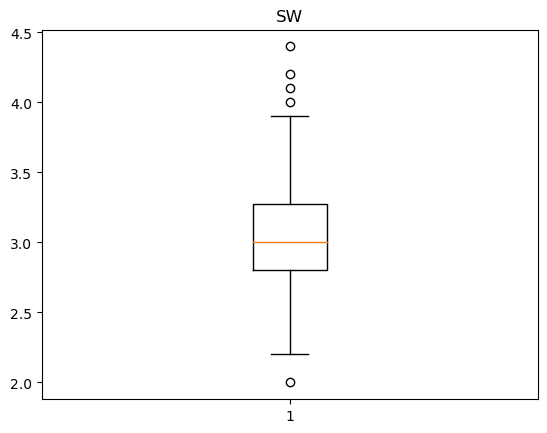

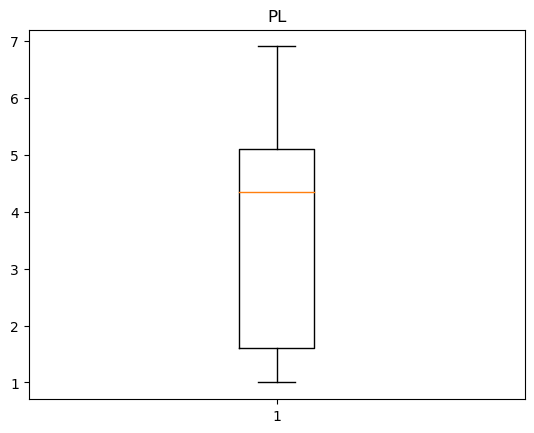

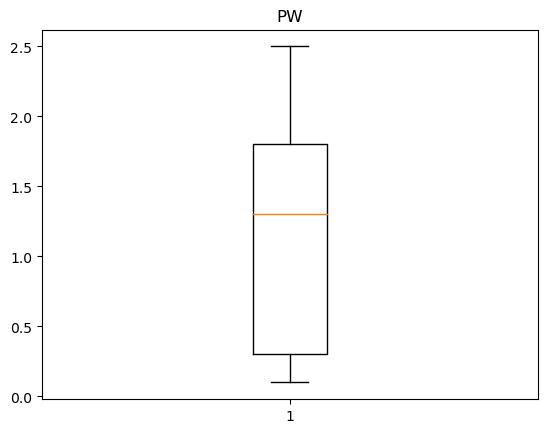

In [16]:
#for finding outliers
for i in ['SL','SW','PL','PW']:
    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

'sw'have outliers

In [17]:
#for calculating quartiles of'SW'columns
Q1=np.percentile(df['SW'],25,interpolation='midpoint')
Q2=np.percentile(df['SW'],50,interpolation='midpoint')
Q3=np.percentile(df['SW'],75,interpolation='midpoint')

In [18]:
#printing the quartile values respectively
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [19]:
#medain is same as that of Q2
df['SW'].median()

3.0

In [20]:
#findinf Inter Quartile Range
IQR=Q3-Q1
IQR

0.4500000000000002

In [21]:
#calculating lower limit and upper limit
low_lim=Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR

In [22]:
#for identifying outliers
outlier =[]
for x in df['SW']:
    if (x>up_lim) or (x<low_lim):
        outlier.append(x)

In [23]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [24]:
#for identifying index labels of lower limit
ind =df['SW']<low_lim
df.loc[ind].index

Int64Index([60], dtype='int64')

In [25]:
#for identifying index labels of upperlimit
ind = df['SW']>up_lim
df.loc[ind].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [26]:
#drop the specified index rows
df.drop([ 60,14, 15, 32, 33],inplace=True)

In [27]:
df.shape

(145, 5)

In [28]:
#to count the number of occurance in the classification ccolumn
df['Classification'].value_counts()

Iris-virginica     50
Iris-versicolor    49
Iris-setosa        46
Name: Classification, dtype: int64

In [29]:
#importing label encoder to convert categorical column to numerical column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 

In [30]:
df['Classification']= le.fit_transform(df['Classification'])

In [31]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [32]:
#split it into feature and target
y = df['Classification']
X=df.drop(['Classification'],axis=1)

In [33]:
#split the data into testing and training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

# model training


# 1.Logistic Regression

In [34]:
#logistic regression modelfrom sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
model = clf.fit(X_train,y_train)

In [35]:
y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred,average='macro'))
print('Recall = ',recall_score(y_test,y_pred,average='macro'))
print('f1 score = ',f1_score(y_test,y_pred,average='macro'))

Accuracy =  0.8918918918918919
Precision =  0.8834498834498835
Recall =  0.8915343915343915
f1 score =  0.8839506172839506


In [37]:
y_pred =model.predict(X_test)

In [38]:
print (y_pred)

[1 2 0 0 0 2 2 2 1 0 0 1 1 2 1 0 2 2 2 1 1 2 0 1 0 0 1 1 2 0 0 1 2 2 0 0 2]


In [39]:
confusion_matrix(y_test,y_pred)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  2, 12]], dtype=int64)

# 2.KNN

In [40]:
#importing knn algorithms
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    model = classifier.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)

In [41]:
metric_k

[0.918918918918919,
 0.8918918918918919,
 0.918918918918919,
 0.8648648648648649,
 0.8918918918918919,
 0.8378378378378378,
 0.918918918918919,
 0.8918918918918919,
 0.918918918918919,
 0.8648648648648649,
 0.8648648648648649,
 0.8648648648648649]

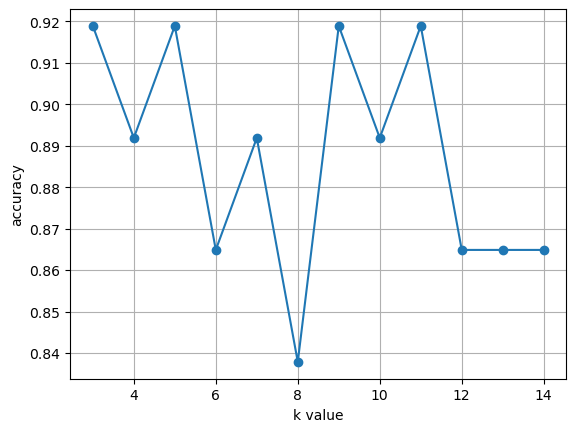

In [42]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()
plt.show()

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred,average='macro'))
print('Recall = ',recall_score(y_test,y_pred,average='macro'))
print('f1 score = ',f1_score(y_test,y_pred,average='macro'))

Accuracy =  0.8648648648648649
Precision =  0.861111111111111
Recall =  0.8677248677248678
f1 score =  0.8570071903405238


# 3.SVM

In [44]:
#svm
from sklearn.svm import SVC
svmclf =SVC(kernel='linear')
            
            
svmclf.fit(X_train,y_train)

SVC(kernel='linear')

In [45]:
y_pred_svm=svmclf.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [47]:
print('Accuracy= ',accuracy_score(y_test,y_pred_svm))
print('f1 score = ',f1_score(y_test,y_pred_svm,average='macro'))

Accuracy=  0.918918918918919
f1 score =  0.9103313840155945


In [48]:
print(confusion_matrix(y_test,y_pred_svm))

[[14  0  0]
 [ 0  8  1]
 [ 0  2 12]]


In [49]:
from sklearn.svm import SVC
svmclf =SVC(kernel='rbf')
            
svmclf.fit(X_train,y_train)            

SVC()

In [50]:
y_pred_svm=svmclf.predict(X_test)

In [51]:
print('Accuracy= ',accuracy_score(y_test,y_pred_svm))
print('f1 score = ',f1_score(y_test,y_pred_svm,average='macro'))

Accuracy=  0.8648648648648649
f1 score =  0.8570071903405238


In [52]:
from sklearn.svm import SVC
svmclf =SVC(kernel='poly')
            
svmclf.fit(X_train,y_train)  

SVC(kernel='poly')

In [53]:
y_pred_svm=svmclf.predict(X_test)

In [54]:
print('Accuracy= ',accuracy_score(y_test,y_pred_svm))
print('f1 score = ',f1_score(y_test,y_pred_svm,average='macro'))

Accuracy=  0.9459459459459459
f1 score =  0.9391230310770541


# decision tree

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [56]:
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train,y_train)


                  

DecisionTreeClassifier(random_state=42)

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [58]:
y_pred_dt=dt_clf.predict(X_test)

In [59]:
print('Accuracy= ',accuracy_score(y_test,y_pred_dt))
print('f1 score = ',f1_score(y_test,y_pred_dt,average='macro'))

Accuracy=  0.918918918918919
f1 score =  0.9103313840155945


In [60]:
print(confusion_matrix(y_test,y_pred_dt))

[[14  0  0]
 [ 0  8  1]
 [ 0  2 12]]


# random forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=20)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [62]:
y_pred_rf=rf_clf.predict(X_test)

In [63]:
print('Accuracy= ',accuracy_score(y_test,y_pred_rf))
print('f1 score = ',f1_score(y_test,y_pred_rf,average='macro'))

Accuracy=  0.918918918918919
f1 score =  0.9103313840155945


In [64]:
print(confusion_matrix(y_test,y_pred_rf))

[[14  0  0]
 [ 0  8  1]
 [ 0  2 12]]


from the above 
accuracy:logistic 89%,knn 86%,svm(linear-92%,rbf-86%,poly-94%),decesion tree 92%,random forest 92%
f1 score:logistic 88%,knn86 %,svm(linear-91%,rbf-85%,poly-93%),decesion tree 91%,random forest 91%
therefore svm polynomial is the best model